# Data Visualization - Plots

In this notebook we will work through a variety of commonly used plots and implement them using matlibplot. Feel free to modify the code and re-run to see the results.

The first thing we need to do is load some data sets that we will use in our plotting demos. We will make of the *iris* dataset (loaded from Scikit-learn) and some real-world data collected using an inertial measurement unit (IMU) from a livestock monitoring experiment. The IMU data includes timeseries data for an 3-axis accelerometer and gyroscope sensor sampled at 20Hz that was mounted on a collar warn by a Merino sheep. The sample provided in imu_dataset.csv is a small segment that was captured when the animal was ruminating (essentially chewing). This produces a distinctive cyclic pattern in the timeseries data.

To start we will import the python modules that we need.

In [14]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets

## Loading the Data

Next we will import the iris dataset and extract the items we need for the examples.

In [15]:
iris = datasets.load_iris()
X = iris.data
tgt = iris.target

Now we can import our IMU data. We will start by creating some empty numpy arrays to store the data. We will create an array for the accelerometer sensor and a second array for the gyroscope data. Each array will have three columns (one for each axis of the sensor). We will follow the standard patter for importing data - open the file, read the data line by line using the cdv functions.

We will iteratively add the rows of data to the ax_set and gx_set arrays using the `append` function provided by the numpy array object.

In [16]:
# Create empty 3D np.arrays to store the accelerometer and gyroscope data 
ax_set = np.empty((0,3), float)
gx_set = np.empty((0,3), float)

# Read the data line-by-line into the 3D arrays
with open('imu_dataset.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        #We are only interested in the accelerometer data
        temp_Arr = np.array([float(row[1]), float(row[2]),float(row[3]),
                             float(row[4]), float(row[5]),float(row[6])])
        ax_set = np.append(ax_set,[temp_Arr[0:3]], axis = 0);
        gx_set = np.append(gx_set, [temp_Arr[3:6]], axis = 0)

## Line Plot

Now we can plot our data using a simple line plot. We will only plot the slice of data that lies in the range `segment_to_view_start` through to `segment_to_view_end`. This is placed in the index for the 'row' dimension. columns 0,1 and 2 correspond to the data x, y and z axis of the sensors.  

Text(0, 0.5, 'Angle')

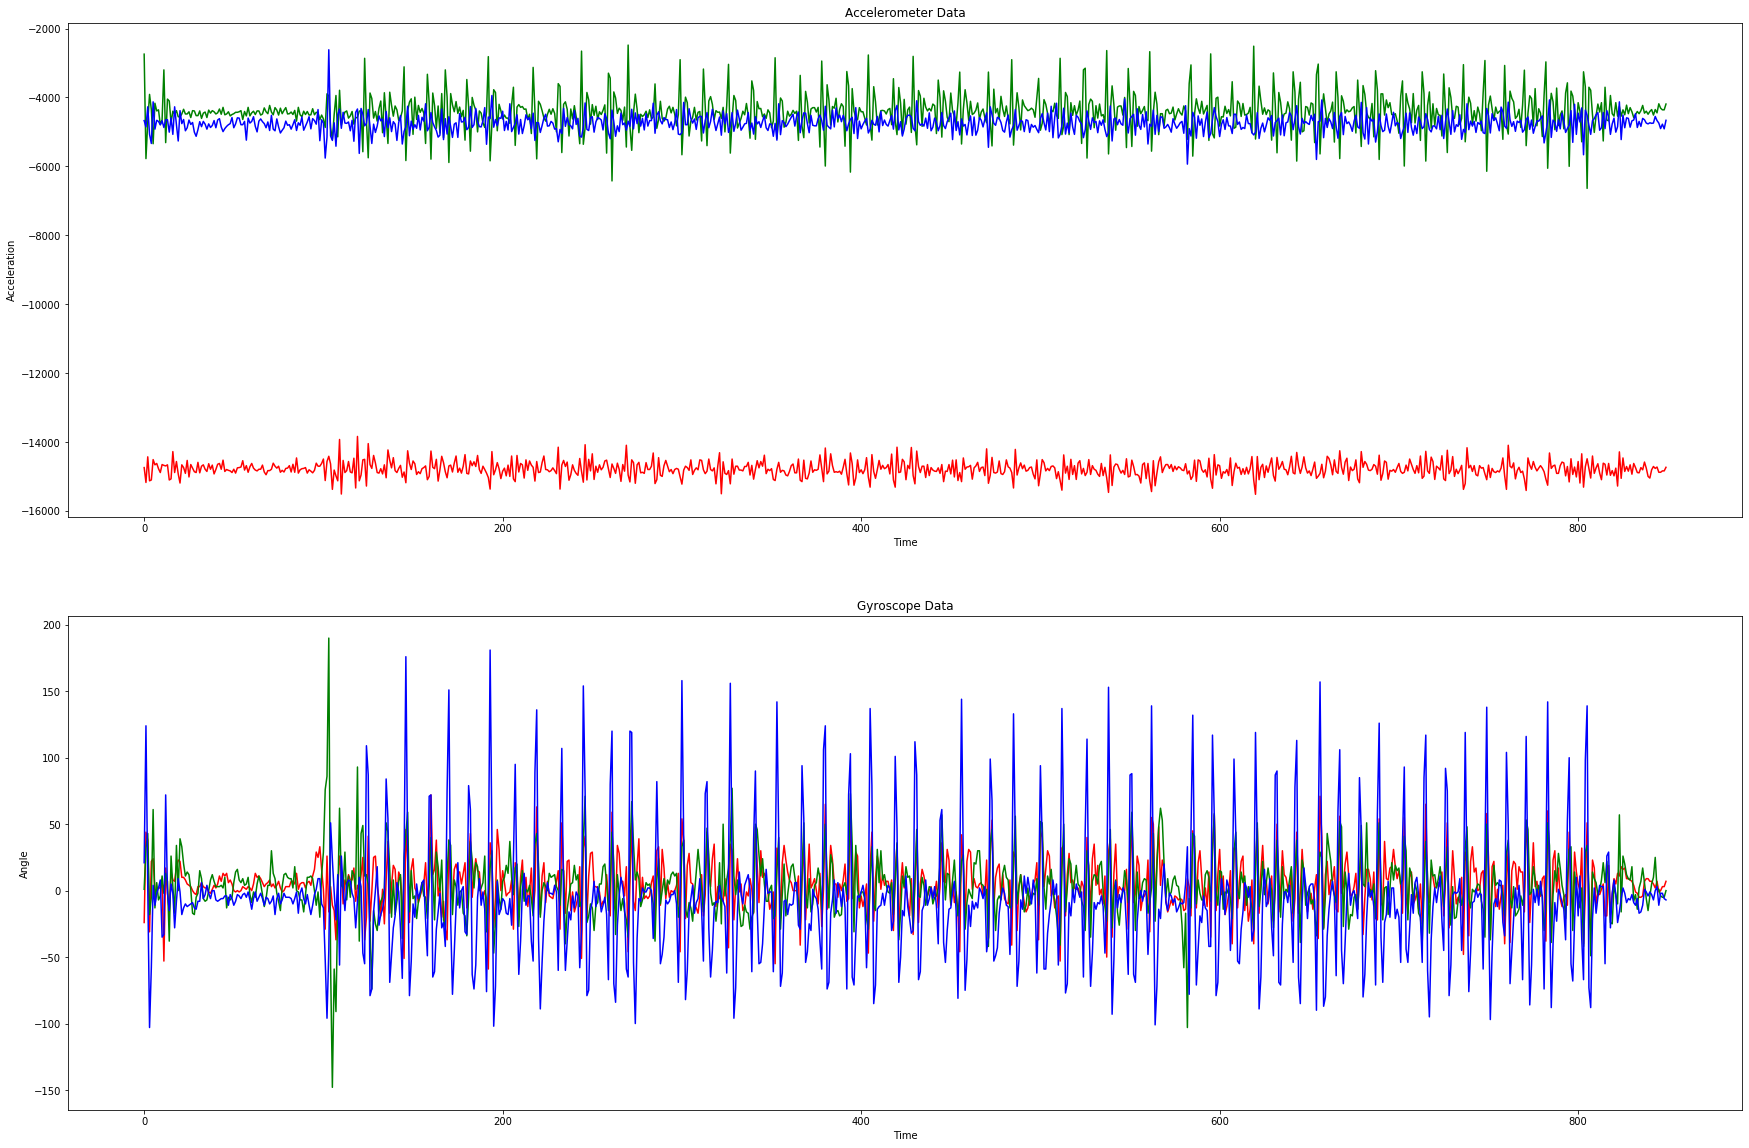

In [17]:
# The segment that we want to analyse - the whole segment contains 5000 samples (250 seconds)
# Try changing this to 1000, 1850 to view a single 'cycle'
segment_to_view_start = 1000
segment_to_view_end = 1850

# Plot the acceleration data
fig, ax = plt.subplots(nrows=2,figsize=(30,20))
ax[0].set_title('Accelerometer Data')      
ax[0].plot(ax_set[segment_to_view_start:segment_to_view_end,0], 'r-')
ax[0].plot(ax_set[segment_to_view_start:segment_to_view_end,1], 'g-')
ax[0].plot(ax_set[segment_to_view_start:segment_to_view_end,2], 'b-')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Acceleration')

# Plot the gyroscope data
ax[1].set_title('Gyroscope Data')
ax[1].plot(gx_set[segment_to_view_start:segment_to_view_end,0], 'r-')
ax[1].plot(gx_set[segment_to_view_start:segment_to_view_end,1], 'g-')
ax[1].plot(gx_set[segment_to_view_start:segment_to_view_end,2], 'b-')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Angle')

## Scatter Plots
The next part of this demostration will involve creating a series of scatter plots for the iris dataset. We will create a colour map that will be used to set the colours of the points based on their species.

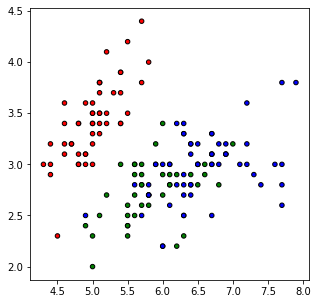

In [21]:
cmap_bold = ListedColormap(['red', 'green', 'blue'])
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], c=tgt, cmap=cmap_bold,
                              edgecolor='k', s=20)

In the next example we use the 'scatter' function to draw a scatter plot for each combination of the 4 columns in the iris dataset. We use two 'nested' loops to draw a scatter plot for each combination of the columns, creating 4x4 grid of scatter plots. This is an effective way to review multi-dimensional data.

This example makes use of the `range( ... )` function to create the lists that we iterate through to generate the plots. We make use of the `suptitle( ... )` function to place a title at the top of the figure (i.e. above the axes within the subplots).


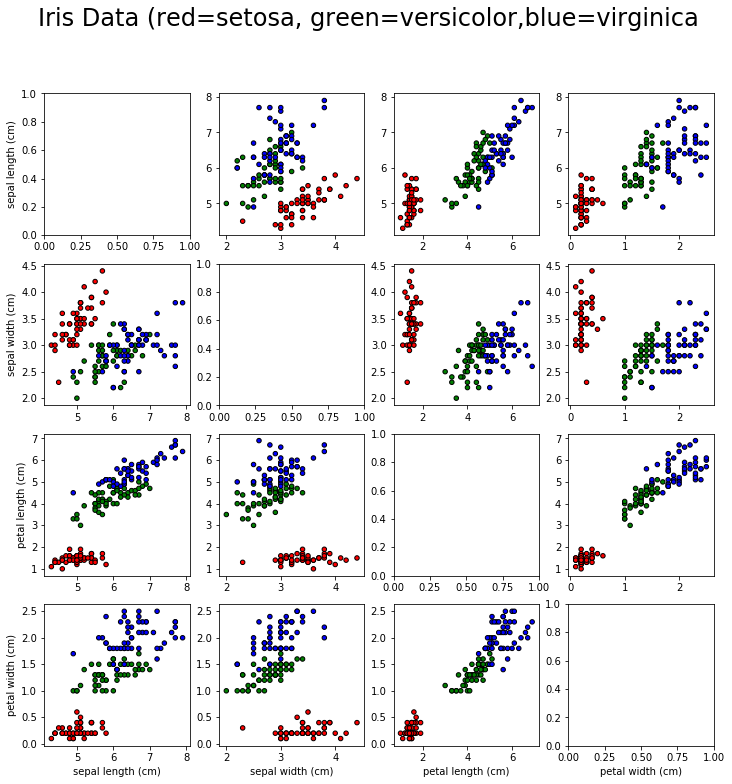

In [22]:
cmap_bold = ListedColormap(['red', 'green', 'blue'])

fig, axs = plt.subplots(4, 4, figsize=(12, 12))

for x in range(0,4):
    for y in range(0,4):
        if x == 0:
            axs[y, x].set_ylabel(iris.feature_names[y])
        if y == 3:
            axs[y, x].set_xlabel(iris.feature_names[x])
        if x != y:
            axs[y, x].scatter(X[:, x], X[:, y], c=tgt, cmap=cmap_bold,
                              edgecolor='k', s=20)
fig.suptitle('Iris Data (red=setosa, green=versicolor,blue=virginica',fontsize=24)
plt.show()

## Bar Charts

This is a really quick demo of the `barh` function to draw an horizontal bar chart. In this example, we create a mock categorical dataset for the demonstration.

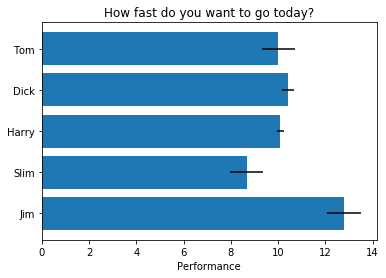

In [7]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

# Example mock data for the demo
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

## Histogram

In this demonstration we will create a simple histograms of our accelerometer data imported above. In this first example, we will plot a histogram of the x-axis from the accelerometer data (i.e. the data in column 0). We will divide our data into  100 bins for the plow.

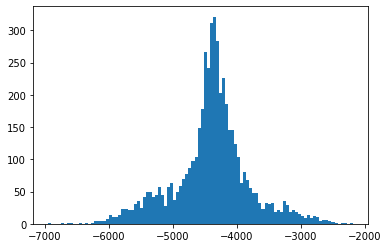

In [8]:
# the histogram of the data
fig, ax = plt.subplots()
nbins = 100
n, bins, patches = ax.hist(ax_set[:,1], nbins)


In this next example, we can create a multi-histogram displaying the distributions of the x,y and z axes respectively (columns 0, 1 and 2).

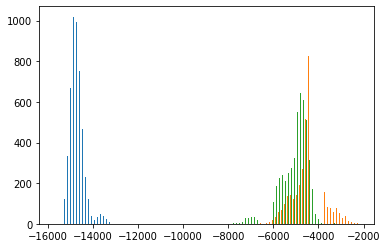

In [23]:
# the histogram of the data
fig, ax = plt.subplots()
n, bins, patches = ax.hist(ax_set, nbins)

## Box Plots

In this example we will create a simple box plot for the accelerometer data plotted in the histograms in the previous example. Recall that box plots provide a summary of the data's distribution by ploting the min, max, median, UQ and LQ along with points identified as outliers.

Text(0.5, 1.0, 'Multi Box Plot')

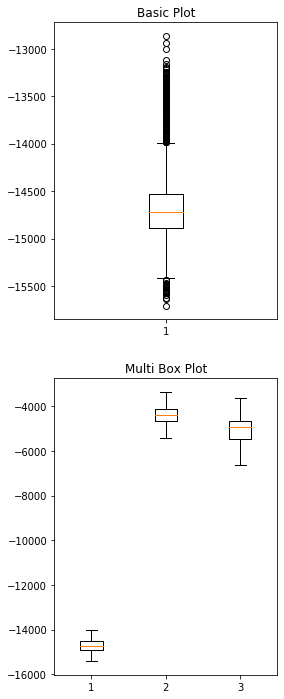

In [26]:
fig, axs = plt.subplots(nrows=2, figsize=(4, 12))

# basic plot
axs[0].boxplot(ax_set[:,0])
axs[0].set_title('Basic Plot')

# Plot multiple series - in this examplewe turn the outlier plot off by setting sym=''
axs[1].boxplot(ax_set,sym='')
axs[1].set_title('Multi Box Plot')

## 2D Histogram (Heat Map)

In this example, we will demonstrate the creation of a 2-dimensional histgram of the x and y acceleraometer data. We will first construct a scatter plot and then construct the corresponding 2D histogram to deomonstrate the concept. Notice that it is difficult to view the structure of the data in the scatter plot due to the large number of data points. The 2D histogram provides an effective way to analyse large datasets like this by revealing some of the underlying structure.

We use the `colorbar( ... )` function to include the colour bar that corresponds to the counts that fall within each 2D bin.


Text(0, 0.5, 'Ay')

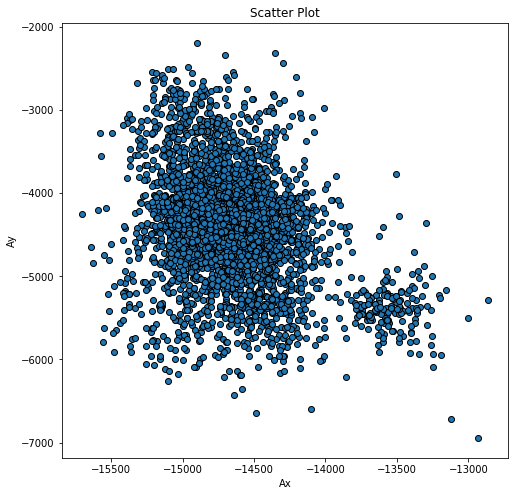

In [29]:
# Scatter
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(ax_set[:,0], ax_set[:,1], edgecolor='k')
ax.set_title('Scatter Plot')
ax.set_xlabel('Ax')
ax.set_ylabel('Ay')


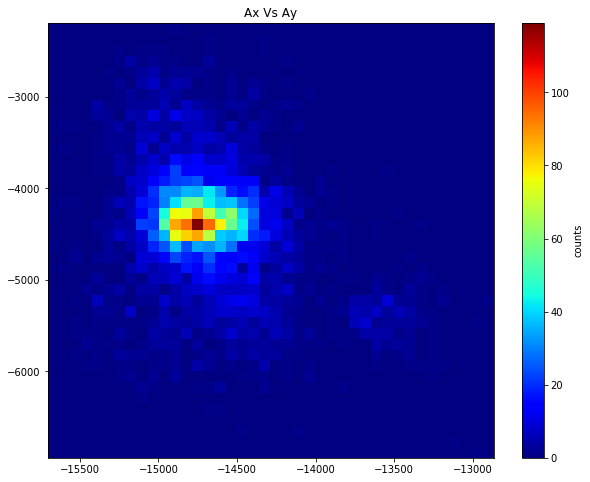

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Ax Vs Ay')
hs = ax.hist2d(ax_set[:,0], ax_set[:,1], bins=40, cmap='jet')
cb = fig.colorbar(hs[3], ax=ax)
cb.set_label('counts')
ax.set_xlabel('Ax')
ax.set_ylabel('Ay')


You can even use hexagonal bins with the `hexbin( ... )` function.

Text(0, 0.5, 'Ay')

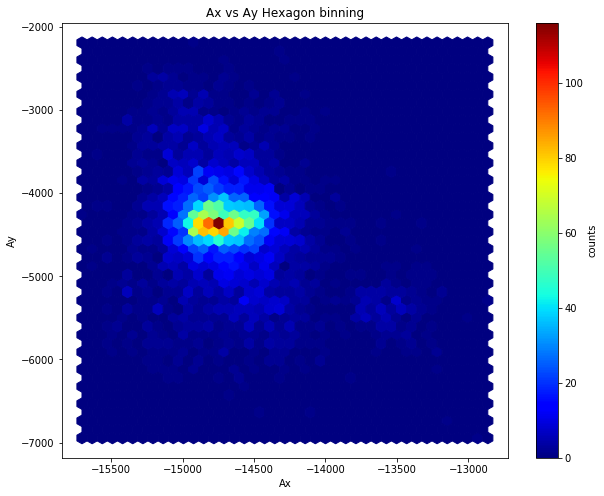

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
hb = ax.hexbin(ax_set[:,0], ax_set[:,1], gridsize=40, cmap='jet')
ax.set_title("Ax vs Ay Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')
ax.set_xlabel('Ax')
ax.set_ylabel('Ay')